In [794]:
import pandas as pd
import sweetviz as sv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from icecream import ic
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from fuzzywuzzy import process
warnings.filterwarnings('ignore')

In [795]:
os.chdir('C:/Users/edwin/OneDrive/Escritorio/Personal files/Courses/Semester 2/Capstone Project/Databases')

In [796]:
os.listdir()

['businesscategories_tocsv.csv',
 'BusinessReport.pbix',
 'city-wards-data-4326.geojson',
 'dataframe_withlocations.csv',
 'data_summarized.csv',
 'db_filtered_NoNAs.csv',
 'db_filtered_wNAs.csv',
 'df_icecream.csv',
 'df_other.csv',
 'df_wards.csv',
 'FinalDB_Wards.xlsx',
 'final_df_wcategories.csv',
 'formatted_op_names.xlsx',
 'iterated_cat.csv',
 'licenses_business.xlsx',
 'licenses_final.xlsx',
 'ODBus_v1.csv',
 'Other Databases',
 'prob_exit_byyear.csv',
 'sample.csv',
 'summarized_probex.csv',
 'summarized_survival.csv',
 'SWEETVIZ_REPORT.html',
 'toronto data.csv',
 'Toronto-population.csv',
 'toronto_df_locations.csv',
 'toronto_wards.json',
 'Unemployement.xlsx',
 'vancouver data.csv',
 'Ward Demographic information Profiles.xlsx']

In [797]:
df_wards=pd.read_csv("data_summarized.csv")
df_wards.head()

,operating_name,first_category_vendor,First_Category,first_issued,last_date_opname,last_ward_id,Count of ward_id,Years_Operation,Years_Operation (bins)
0,"""X"" Treme Ice Cream",motorized refreshment vehicle owner,Desserts and Sweets,1998-04-15 00:00:00,2018-09-10 00:00:00,21,1,20.42,20
1,1435943 Ontario,non-motorized refreshment vehicle owner,NaN,2008-11-05 00:00:00,2011-02-05 00:00:00,20,1,2.25,0
2,1555184 Ontario,non-motorized refreshment vehicle owner,Desserts and Sweets,2003-07-14 00:00:00,2009-10-14 00:00:00,25,1,6.25,5
3,18 Feet,motorized refreshment vehicle owner,Beverages,2019-06-21 00:00:00,2020-11-03 00:00:00,12,1,1.42,0
4,1871537 Ontario Inc,motorized refreshment vehicle owner,Specialty and Fusion,2012-06-22 00:00:00,2015-09-25 00:00:00,1,1,3.25,0


In [798]:
df_notnulls=df_wards[~df_wards.First_Category.isna()]
df_notnulls

,operating_name,first_category_vendor,First_Category,first_issued,last_date_opname,last_ward_id,Count of ward_id,Years_Operation,Years_Operation (bins)
0,"""X"" Treme Ice Cream",motorized refreshment vehicle owner,Desserts and Sweets,1998-04-15 00:00:00,2018-09-10 00:00:00,21,1,20.42,20
2,1555184 Ontario,non-motorized refreshment vehicle owner,Desserts and Sweets,2003-07-14 00:00:00,2009-10-14 00:00:00,25,1,6.25,5
3,18 Feet,motorized refreshment vehicle owner,Beverages,2019-06-21 00:00:00,2020-11-03 00:00:00,12,1,1.42,0
4,1871537 Ontario Inc,motorized refreshment vehicle owner,Specialty and Fusion,2012-06-22 00:00:00,2015-09-25 00:00:00,1,1,3.25,0
5,1945261 Ontario Inc,non-motorized refreshment vehicle owner,American Cuisine,2015-12-31 00:00:00,2017-04-02 00:00:00,21,1,1.33,0
...,...,...,...,...,...,...,...,...,...
1096,Yogen Fruz,motorized refreshment vehicle owner,Desserts and Sweets,2016-07-26 00:00:00,2017-05-17 00:00:00,3,1,0.83,0
1097,Youssouf M,non-motorized refreshment vehicle owner,American Cuisine,2016-05-13 00:00:00,2018-08-13 00:00:00,13,1,2.25,0
1098,Yummy Hotdogs,non-motorized refreshment vehicle owner,American Cuisine,2010-07-16 00:00:00,2024-02-01 00:00:00,6,2,13.58,10
1099,Yummy Ice Cream,motorized refreshment vehicle owner,Desserts and Sweets,2008-07-18 00:00:00,2018-09-10 00:00:00,9,1,10.17,10


In [799]:
# Convert date columns to datetime type if not already done
df_notnulls['first_issued'] = pd.to_datetime(df_notnulls['first_issued'])
df_notnulls['last_date_opname'] = pd.to_datetime(df_notnulls['last_date_opname'])

In [800]:
# Define the function to check survival for a given number of years
def check_survival(df, years):
    # Adding the number of years to the 'first_issued' column
    survival_date = df['first_issued'] + pd.DateOffset(years=years)
    # Checking if 'last_date_opname' is after the survival date and casting the result to an integer
    return (df['last_date_opname'] >= survival_date).astype(int)

In [801]:
# Define the function to check survival for a given number of months
def check_survival_months(df, months):
    # Adding the number of months to the 'first_issued' column
    survival_date = df['first_issued'] + pd.DateOffset(months=months)
    # Checking if 'last_date_opname' is after the survival date and casting the result to an integer
    return (df['last_date_opname'] >= survival_date).astype(int)

In [802]:
# Applying the function for various year milestones
df_notnulls['6_months_survival'] = check_survival_months(df_notnulls, 6)
df_notnulls['12_months_survival'] = check_survival_months(df_notnulls, 12)
df_notnulls['18_months_survival'] = check_survival_months(df_notnulls, 18)

# Applying the function for various year milestones
df_notnulls['2_year_survival'] = check_survival(df_notnulls, 2)
df_notnulls['3_year_survival'] = check_survival(df_notnulls, 3)
df_notnulls['4_year_survival'] = check_survival(df_notnulls, 4)
df_notnulls['5_year_survival'] = check_survival(df_notnulls, 5)
df_notnulls['6_year_survival'] = check_survival(df_notnulls, 6)
df_notnulls['10_year_survival'] = check_survival(df_notnulls, 10)
df_notnulls['20_year_survival'] = check_survival(df_notnulls, 20)
df_notnulls['30_year_survival'] = check_survival(df_notnulls, 30)
df_notnulls['60_year_survival'] = check_survival(df_notnulls, 60)

In [803]:
df_notnulls.head()

,operating_name,first_category_vendor,First_Category,first_issued,last_date_opname,last_ward_id,Count of ward_id,Years_Operation,Years_Operation (bins),6_months_survival,...,18_months_survival,2_year_survival,3_year_survival,4_year_survival,5_year_survival,6_year_survival,10_year_survival,20_year_survival,30_year_survival,60_year_survival
0,"""X"" Treme Ice Cream",motorized refreshment vehicle owner,Desserts and Sweets,1998-04-15,2018-09-10,21,1,20.42,20,1,...,1,1,1,1,1,1,1,1,0,0
2,1555184 Ontario,non-motorized refreshment vehicle owner,Desserts and Sweets,2003-07-14,2009-10-14,25,1,6.25,5,1,...,1,1,1,1,1,1,0,0,0,0
3,18 Feet,motorized refreshment vehicle owner,Beverages,2019-06-21,2020-11-03,12,1,1.42,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1871537 Ontario Inc,motorized refreshment vehicle owner,Specialty and Fusion,2012-06-22,2015-09-25,1,1,3.25,0,1,...,1,1,1,0,0,0,0,0,0,0
5,1945261 Ontario Inc,non-motorized refreshment vehicle owner,American Cuisine,2015-12-31,2017-04-02,21,1,1.33,0,1,...,0,0,0,0,0,0,0,0,0,0


In [804]:
df_notnulls_cleaned=df_notnulls[df_notnulls["first_category_vendor"]!="mobile vending (ice cream truck)"]

In [805]:
total_bycat=df_notnulls_cleaned.groupby(by=["last_ward_id","first_category_vendor","First_Category"]).count()[["first_issued"]].reset_index().rename(columns={"first_issued":"Total"})
total_bycat.head()

,last_ward_id,first_category_vendor,First_Category,Total
0,1,motorized refreshment vehicle owner,American Cuisine,4
1,1,motorized refreshment vehicle owner,Asian Cuisine,1
2,1,motorized refreshment vehicle owner,Desserts and Sweets,2
3,1,motorized refreshment vehicle owner,Other international food,2
4,1,motorized refreshment vehicle owner,Specialty and Fusion,1


In [806]:
total_survival=df_notnulls_cleaned.groupby(by=["last_ward_id","first_category_vendor","First_Category"]).sum()[["6_months_survival"	,"12_months_survival",	"18_months_survival","2_year_survival","3_year_survival","4_year_survival","5_year_survival","6_year_survival","10_year_survival",'20_year_survival','30_year_survival', '60_year_survival']].reset_index()
total_survival.head()

,last_ward_id,first_category_vendor,First_Category,6_months_survival,12_months_survival,18_months_survival,2_year_survival,3_year_survival,4_year_survival,5_year_survival,6_year_survival,10_year_survival,20_year_survival,30_year_survival,60_year_survival
0,1,motorized refreshment vehicle owner,American Cuisine,4,4,3,3,2,1,1,0,0,0,0,0
1,1,motorized refreshment vehicle owner,Asian Cuisine,0,0,0,0,0,0,0,0,0,0,0,0
2,1,motorized refreshment vehicle owner,Desserts and Sweets,2,2,0,0,0,0,0,0,0,0,0,0
3,1,motorized refreshment vehicle owner,Other international food,2,2,1,1,1,1,1,1,1,0,0,0
4,1,motorized refreshment vehicle owner,Specialty and Fusion,1,1,1,1,1,0,0,0,0,0,0,0


In [807]:
merged_df=total_survival.merge(total_bycat,on=["last_ward_id","first_category_vendor","First_Category"])
merged_df

,last_ward_id,first_category_vendor,First_Category,6_months_survival,12_months_survival,18_months_survival,2_year_survival,3_year_survival,4_year_survival,5_year_survival,6_year_survival,10_year_survival,20_year_survival,30_year_survival,60_year_survival,Total
0,1,motorized refreshment vehicle owner,American Cuisine,4,4,3,3,2,1,1,0,0,0,0,0,4
1,1,motorized refreshment vehicle owner,Asian Cuisine,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,motorized refreshment vehicle owner,Desserts and Sweets,2,2,0,0,0,0,0,0,0,0,0,0,2
3,1,motorized refreshment vehicle owner,Other international food,2,2,1,1,1,1,1,1,1,0,0,0,2
4,1,motorized refreshment vehicle owner,Specialty and Fusion,1,1,1,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,25,motorized refreshment vehicle owner,Other international food,2,2,2,2,2,1,0,0,0,0,0,0,2
252,25,non-motorized refreshment vehicle owner,American Cuisine,14,13,8,8,7,7,5,5,2,0,0,0,14
253,25,non-motorized refreshment vehicle owner,Canadian Cuisine,1,1,0,0,0,0,0,0,0,0,0,0,1
254,25,non-motorized refreshment vehicle owner,Desserts and Sweets,2,2,2,2,2,2,2,2,0,0,0,0,2


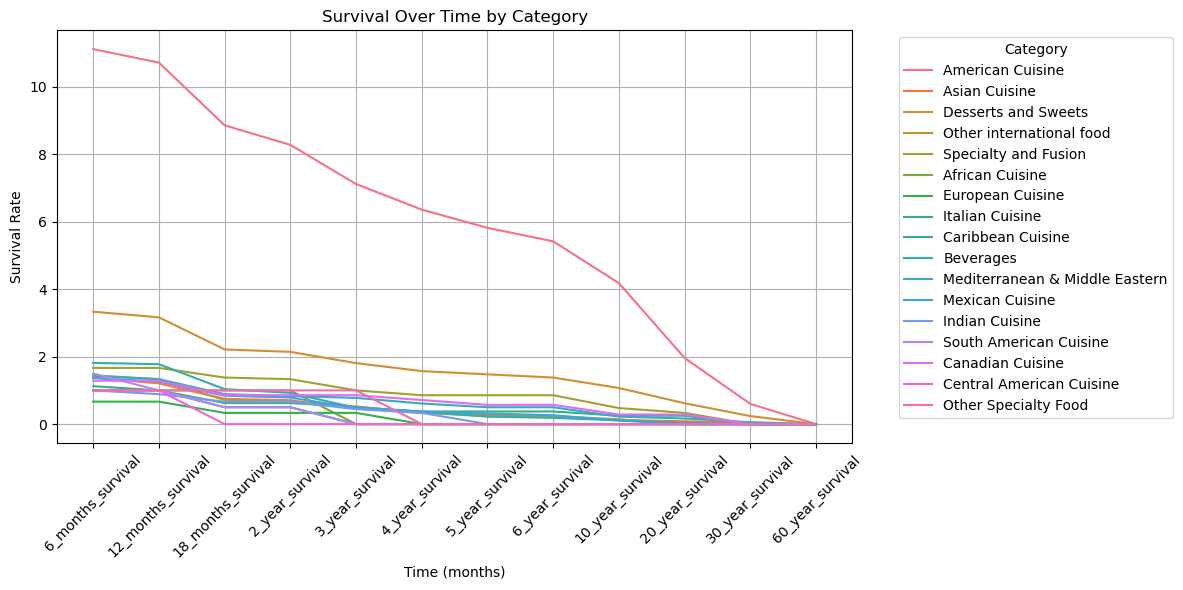

In [808]:
# Melt the DataFrame to long format for easier plotting
melted_df = pd.melt(merged_df, id_vars=['last_ward_id', 'first_category_vendor', 'First_Category'], 
                    value_vars=['6_months_survival', '12_months_survival', '18_months_survival', 
                                '2_year_survival', '3_year_survival', '4_year_survival', '5_year_survival',  '6_year_survival', 
                                '10_year_survival', '20_year_survival', '30_year_survival', '60_year_survival'], 
                    var_name='Time', value_name='Survival')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='Time', y='Survival', hue='First_Category', ci=None)
plt.title('Survival Over Time by Category')
plt.xlabel('Time (months)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [809]:
melted_df.to_csv("summarized_survival.csv")

In [810]:
merged_df["6_months_exit_prob"]=(merged_df["Total"]-merged_df["6_months_survival"])/merged_df["Total"]
merged_df["12_months_exit_prob"]=(merged_df["6_months_survival"]-merged_df["12_months_survival"])/merged_df["6_months_survival"]
merged_df["18_months_exit_prob"]=(merged_df["12_months_survival"]-merged_df["18_months_survival"])/merged_df["12_months_survival"]
merged_df["2_year_exit_prob"]=(merged_df["18_months_survival"]-merged_df["2_year_survival"])/merged_df["18_months_survival"]
merged_df["3_year_exit_prob"]=(merged_df["2_year_survival"]-merged_df["3_year_survival"])/merged_df["2_year_survival"]
merged_df["4_year_exit_prob"]=(merged_df["3_year_survival"]-merged_df["4_year_survival"])/merged_df["3_year_survival"]
merged_df["5_year_exit_prob"]=(merged_df["4_year_survival"]-merged_df["5_year_survival"])/merged_df["4_year_survival"]
merged_df["6_year_exit_prob"]=(merged_df["5_year_survival"]-merged_df["6_year_survival"])/merged_df["5_year_survival"]
merged_df["10_year_exit_prob"]=(merged_df["6_year_survival"]-merged_df["10_year_survival"])/merged_df["6_year_survival"]
merged_df["20_year_exit_prob"]=(merged_df["10_year_survival"]-merged_df["20_year_survival"])/merged_df["10_year_survival"]
merged_df["30_year_exit_prob"]=(merged_df["20_year_survival"]-merged_df["30_year_survival"])/merged_df["20_year_survival"]
merged_df["60_year_exit_prob"]=(merged_df["30_year_survival"]-merged_df["60_year_survival"])/merged_df["30_year_survival"]
merged_df

,last_ward_id,first_category_vendor,First_Category,6_months_survival,12_months_survival,18_months_survival,2_year_survival,3_year_survival,4_year_survival,5_year_survival,...,18_months_exit_prob,2_year_exit_prob,3_year_exit_prob,4_year_exit_prob,5_year_exit_prob,6_year_exit_prob,10_year_exit_prob,20_year_exit_prob,30_year_exit_prob,60_year_exit_prob
0,1,motorized refreshment vehicle owner,American Cuisine,4,4,3,3,2,1,1,...,0.250000,0.0,0.333333,0.5,0.000000,1.0,NaN,NaN,NaN,NaN
1,1,motorized refreshment vehicle owner,Asian Cuisine,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,motorized refreshment vehicle owner,Desserts and Sweets,2,2,0,0,0,0,0,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,motorized refreshment vehicle owner,Other international food,2,2,1,1,1,1,1,...,0.500000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,NaN,NaN
4,1,motorized refreshment vehicle owner,Specialty and Fusion,1,1,1,1,1,0,0,...,0.000000,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,25,motorized refreshment vehicle owner,Other international food,2,2,2,2,2,1,0,...,0.000000,0.0,0.000000,0.5,1.000000,NaN,NaN,NaN,NaN,NaN
252,25,non-motorized refreshment vehicle owner,American Cuisine,14,13,8,8,7,7,5,...,0.384615,0.0,0.125000,0.0,0.285714,0.0,0.6,1.0,NaN,NaN
253,25,non-motorized refreshment vehicle owner,Canadian Cuisine,1,1,0,0,0,0,0,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,25,non-motorized refreshment vehicle owner,Desserts and Sweets,2,2,2,2,2,2,2,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,NaN,NaN,NaN


In [811]:
merged_df[(merged_df['First_Category']=="American Cuisine") & (merged_df["last_ward_id"]==6)]

,last_ward_id,first_category_vendor,First_Category,6_months_survival,12_months_survival,18_months_survival,2_year_survival,3_year_survival,4_year_survival,5_year_survival,...,18_months_exit_prob,2_year_exit_prob,3_year_exit_prob,4_year_exit_prob,5_year_exit_prob,6_year_exit_prob,10_year_exit_prob,20_year_exit_prob,30_year_exit_prob,60_year_exit_prob
55,6,motorized refreshment vehicle owner,American Cuisine,3,3,3,3,3,3,3,...,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.333333,0.5,0.000000,1.0
61,6,non-motorized refreshment vehicle owner,American Cuisine,27,26,21,20,17,17,16,...,0.192308,0.047619,0.15,0.0,0.058824,0.0,0.125000,0.5,0.857143,1.0


In [812]:
unmelted_df=merged_df[[
    'last_ward_id', 'first_category_vendor', 'First_Category',
    "6_months_exit_prob",	"12_months_exit_prob",	"18_months_exit_prob",	"2_year_exit_prob",	"3_year_exit_prob",	"4_year_exit_prob",	"5_year_exit_prob",	"6_year_exit_prob",	"10_year_exit_prob",	"20_year_exit_prob",	"30_year_exit_prob",	"60_year_exit_prob"
]].rename(
    columns={
    "6_months_exit_prob":"6 months",	
    "12_months_exit_prob":"12 months",
    "18_months_exit_prob":"18 months",	
    "2_year_exit_prob":"2 years",	
    "3_year_exit_prob":"3 years",	
    "4_year_exit_prob":"4 years",	
    "5_year_exit_prob":"5 years",	
    "6_year_exit_prob":"6 years",	
    "10_year_exit_prob":"10 years",	
    "20_year_exit_prob":"20 years",	
    "30_year_exit_prob":"30 years",
    "60_year_exit_prob":"60 years"
    }
)

unmelted_df.head()

,last_ward_id,first_category_vendor,First_Category,6 months,12 months,18 months,2 years,3 years,4 years,5 years,6 years,10 years,20 years,30 years,60 years
0,1,motorized refreshment vehicle owner,American Cuisine,0.0,0.0,0.25,0.0,0.333333,0.5,0.0,1.0,NaN,NaN,NaN,NaN
1,1,motorized refreshment vehicle owner,Asian Cuisine,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,motorized refreshment vehicle owner,Desserts and Sweets,0.0,0.0,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,motorized refreshment vehicle owner,Other international food,0.0,0.0,0.50,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,NaN,NaN
4,1,motorized refreshment vehicle owner,Specialty and Fusion,0.0,0.0,0.00,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [813]:
# Melt the DataFrame to long format for easier plotting
melted_df_probex = pd.melt(unmelted_df, id_vars=['last_ward_id', 'first_category_vendor', 'First_Category'], 
                    value_vars=['6 months', '12 months', '18 months', 
                                '2 years', '3 years', '4 years', '5 years',  '6 years', 
                                '10 years', '20 years', '30 years', '60 years'], 
                    var_name='Time', value_name='Prob_Exit')

In [814]:
melted_df_probex.head()

,last_ward_id,first_category_vendor,First_Category,Time,Prob_Exit
0,1,motorized refreshment vehicle owner,American Cuisine,6 months,0.0
1,1,motorized refreshment vehicle owner,Asian Cuisine,6 months,1.0
2,1,motorized refreshment vehicle owner,Desserts and Sweets,6 months,0.0
3,1,motorized refreshment vehicle owner,Other international food,6 months,0.0
4,1,motorized refreshment vehicle owner,Specialty and Fusion,6 months,0.0


In [815]:
melted_df_probex.to_csv("summarized_probex.csv")

In [816]:
unmelted_df.to_csv("prob_exit_byyear.csv")

In [817]:
final_melted_df = pd.melt(unmelted_df, id_vars=['last_ward_id', 'first_category_vendor', 'First_Category'], 
                    value_vars=["6 months",	"12 months",	"18 months",	"2 years",	"3 years",	"4 years",	"5 years",	"6 years",	"10 years",	"20 years",	"30 years",	"60 years"], 
                    var_name='Time', value_name='Probability_Exit')
final_melted_df.head()

,last_ward_id,first_category_vendor,First_Category,Time,Probability_Exit
0,1,motorized refreshment vehicle owner,American Cuisine,6 months,0.0
1,1,motorized refreshment vehicle owner,Asian Cuisine,6 months,1.0
2,1,motorized refreshment vehicle owner,Desserts and Sweets,6 months,0.0
3,1,motorized refreshment vehicle owner,Other international food,6 months,0.0
4,1,motorized refreshment vehicle owner,Specialty and Fusion,6 months,0.0


In [818]:
# Create a new column 'is_active' with 1 if 'last_date_opname' is '2024-02-01', else 0
df_notnulls['is_active'] = (df_notnulls['last_date_opname'] == '2024-02-01').astype(int)
df_notnulls.drop(columns=["6_months_survival",	"12_months_survival",	"18_months_survival",	"2_year_survival",	"3_year_survival",	"4_year_survival",	"5_year_survival",	"6_year_survival",	"10_year_survival",	"20_year_survival",	"30_year_survival",	"60_year_survival"],inplace=True)

In [819]:
df_notnulls['first_issued'] = pd.to_datetime(df_notnulls['first_issued'])
df_notnulls['last_date_opname'] = pd.to_datetime(df_notnulls['last_date_opname'])

# Function for month-based classifications
def classify_by_months(months_difference):
    if months_difference < 6:
        return "6 months"
    elif months_difference < 12:
        return "12 months"
    elif months_difference < 18:
        return "18 months"
    else:
        return None

# Function for year-based classifications
def classify_by_years(years_difference):
    if years_difference < 2:
        return "2 years"
    elif years_difference < 3:
        return "3 years"
    elif years_difference < 4:
        return "4 years"
    elif years_difference < 5:
        return "5 years"
    elif years_difference < 6:
        return "6 years"
    elif years_difference < 10:
        return "10 years"
    elif years_difference < 20:
        return "20 years"
    elif years_difference < 30:
        return "30 years"
    elif years_difference < 60:
        return "60 years"
    
# Main classification function applying both month and year classifications
def classify_difference(row):
    difference = (row['last_date_opname'] - row['first_issued']) / pd.Timedelta(days=30)  # difference in months
    month_tag = classify_by_months(difference)
    if month_tag:
        return month_tag
    else:
        years_difference = difference / 12  # convert months to years for year-based classification
        return classify_by_years(years_difference)

# Apply the classification function
df_notnulls['Time'] = df_notnulls.apply(classify_difference, axis=1)

In [820]:
df_notnulls.head()

,operating_name,first_category_vendor,First_Category,first_issued,last_date_opname,last_ward_id,Count of ward_id,Years_Operation,Years_Operation (bins),is_active,Time
0,"""X"" Treme Ice Cream",motorized refreshment vehicle owner,Desserts and Sweets,1998-04-15,2018-09-10,21,1,20.42,20,0,30 years
2,1555184 Ontario,non-motorized refreshment vehicle owner,Desserts and Sweets,2003-07-14,2009-10-14,25,1,6.25,5,0,10 years
3,18 Feet,motorized refreshment vehicle owner,Beverages,2019-06-21,2020-11-03,12,1,1.42,0,0,18 months
4,1871537 Ontario Inc,motorized refreshment vehicle owner,Specialty and Fusion,2012-06-22,2015-09-25,1,1,3.25,0,0,4 years
5,1945261 Ontario Inc,non-motorized refreshment vehicle owner,American Cuisine,2015-12-31,2017-04-02,21,1,1.33,0,0,18 months


In [821]:
df_prob_exit=df_notnulls.merge(final_melted_df,on=['last_ward_id', 'first_category_vendor', 'First_Category', 'Time'],how="left")
df_prob_exit.head()

,operating_name,first_category_vendor,First_Category,first_issued,last_date_opname,last_ward_id,Count of ward_id,Years_Operation,Years_Operation (bins),is_active,Time,Probability_Exit
0,"""X"" Treme Ice Cream",motorized refreshment vehicle owner,Desserts and Sweets,1998-04-15,2018-09-10,21,1,20.42,20,0,30 years,1.000000
1,1555184 Ontario,non-motorized refreshment vehicle owner,Desserts and Sweets,2003-07-14,2009-10-14,25,1,6.25,5,0,10 years,1.000000
2,18 Feet,motorized refreshment vehicle owner,Beverages,2019-06-21,2020-11-03,12,1,1.42,0,0,18 months,1.000000
3,1871537 Ontario Inc,motorized refreshment vehicle owner,Specialty and Fusion,2012-06-22,2015-09-25,1,1,3.25,0,0,4 years,1.000000
4,1945261 Ontario Inc,non-motorized refreshment vehicle owner,American Cuisine,2015-12-31,2017-04-02,21,1,1.33,0,0,18 months,0.157895


# Joining with population and unemployment data

In [822]:
unemployment=pd.read_excel('Unemployement.xlsx')
unemployment.tail()

,Year,Unemployment rate
59,1964,0.061824
60,1963,0.061824
61,1962,0.061824
62,1961,0.061824
63,1960,0.061824


In [823]:
unemployment.rename(columns={
    "Year":'year',
    "Unemployment rate":"unemployment"
},inplace=True)
unemployment.head()

,year,unemployment
0,2023,0.046
1,2022,0.046
2,2021,0.069
3,2020,0.078
4,2019,0.045


In [824]:
population=pd.read_csv('Toronto-population.csv')
population.head()

,date,Population,Annual Change
0,1950-12-31,1068000,NaN
1,1951-12-31,1122000,5.06
2,1952-12-31,1178000,4.99
3,1953-12-31,1238000,5.09
4,1954-12-31,1300000,5.01


In [825]:
population['date'] = pd.to_datetime(population['date'])
population.head()

,date,Population,Annual Change
0,1950-12-31,1068000,NaN
1,1951-12-31,1122000,5.06
2,1952-12-31,1178000,4.99
3,1953-12-31,1238000,5.09
4,1954-12-31,1300000,5.01


In [826]:
population['year']=population['date'].dt.year
population.head()

,date,Population,Annual Change,year
0,1950-12-31,1068000,NaN,1950
1,1951-12-31,1122000,5.06,1951
2,1952-12-31,1178000,4.99,1952
3,1953-12-31,1238000,5.09,1953
4,1954-12-31,1300000,5.01,1954


In [827]:
population=population[['year',' Population']]
population.head()

,year,Population
0,1950,1068000
1,1951,1122000
2,1952,1178000
3,1953,1238000
4,1954,1300000


In [828]:
population.rename(columns={' Population':'population'},inplace=True)
population.head()

,year,population
0,1950,1068000
1,1951,1122000
2,1952,1178000
3,1953,1238000
4,1954,1300000


In [829]:
demographics=population.merge(unemployment,on="year",how="left")
demographics.head()

,year,population,unemployment
0,1950,1068000,NaN
1,1951,1122000,NaN
2,1952,1178000,NaN
3,1953,1238000,NaN
4,1954,1300000,NaN


In [830]:
demographics=demographics[~demographics["unemployment"].isna()]
demographics.head()

,year,population,unemployment
10,1960,1744000,0.061824
11,1961,1830000,0.061824
12,1962,1892000,0.061824
13,1963,1957000,0.061824
14,1964,2024000,0.061824


In [831]:
# Add year columns for easier comparison
df_prob_exit['first_issued_year'] = df_prob_exit['first_issued'].dt.year
df_prob_exit['last_date_opname_year'] = df_prob_exit['last_date_opname'].dt.year

# Initialize columns for average population and unemployment
df_prob_exit['average_population'] = 0
df_prob_exit['average_unemployment'] = 0

In [832]:
# Function to calculate averages
def calculate_averages(row):
    years_range = range(row['first_issued_year'], row['last_date_opname_year'] + 1)
    demographics_subset = demographics[demographics['year'].isin(years_range)]
    if not demographics_subset.empty:
        row['average_population'] = demographics_subset['population'].mean()
        row['average_unemployment'] = demographics_subset['unemployment'].mean()
    return row

In [833]:
# Apply the function
df_prob_exit = df_prob_exit.apply(calculate_averages, axis=1)

In [834]:
# Result
print(df_prob_exit[['operating_name', 'average_population', 'average_unemployment']])

          operating_name  average_population  average_unemployment
0    "X" Treme Ice Cream        5.290810e+06              0.056524
1        1555184 Ontario        5.128143e+06              0.056286
2                18 Feet        6.168000e+06              0.061500
3    1871537 Ontario Inc        5.763000e+06              0.060000
4    1945261 Ontario Inc        5.938333e+06              0.053000
..                   ...                 ...                   ...
947           Yogen Fruz        5.974000e+06              0.052500
948           Youssouf M        6.010000e+06              0.050333
949        Yummy Hotdogs        5.960714e+06              0.058143
950      Yummy Ice Cream        5.716909e+06              0.060000
951  Yummy Yummy Kitchen        4.327143e+06              0.067786

[952 rows x 3 columns]


In [835]:
df_prob_exit['average_population_millions']=df_prob_exit['average_population']/1000000
df_prob_exit.head()

,operating_name,first_category_vendor,First_Category,first_issued,last_date_opname,last_ward_id,Count of ward_id,Years_Operation,Years_Operation (bins),is_active,Time,Probability_Exit,first_issued_year,last_date_opname_year,average_population,average_unemployment,average_population_millions
0,"""X"" Treme Ice Cream",motorized refreshment vehicle owner,Desserts and Sweets,1998-04-15,2018-09-10,21,1,20.42,20,0,30 years,1.000000,1998,2018,5.290810e+06,0.056524,5.290810
1,1555184 Ontario,non-motorized refreshment vehicle owner,Desserts and Sweets,2003-07-14,2009-10-14,25,1,6.25,5,0,10 years,1.000000,2003,2009,5.128143e+06,0.056286,5.128143
2,18 Feet,motorized refreshment vehicle owner,Beverages,2019-06-21,2020-11-03,12,1,1.42,0,0,18 months,1.000000,2019,2020,6.168000e+06,0.061500,6.168000
3,1871537 Ontario Inc,motorized refreshment vehicle owner,Specialty and Fusion,2012-06-22,2015-09-25,1,1,3.25,0,0,4 years,1.000000,2012,2015,5.763000e+06,0.060000,5.763000
4,1945261 Ontario Inc,non-motorized refreshment vehicle owner,American Cuisine,2015-12-31,2017-04-02,21,1,1.33,0,0,18 months,0.157895,2015,2017,5.938333e+06,0.053000,5.938333


In [836]:
df_prob_exit.drop(columns=["average_population","first_issued_year","last_date_opname_year"],inplace=True)
df_prob_exit.head()

,operating_name,first_category_vendor,First_Category,first_issued,last_date_opname,last_ward_id,Count of ward_id,Years_Operation,Years_Operation (bins),is_active,Time,Probability_Exit,average_unemployment,average_population_millions
0,"""X"" Treme Ice Cream",motorized refreshment vehicle owner,Desserts and Sweets,1998-04-15,2018-09-10,21,1,20.42,20,0,30 years,1.000000,0.056524,5.290810
1,1555184 Ontario,non-motorized refreshment vehicle owner,Desserts and Sweets,2003-07-14,2009-10-14,25,1,6.25,5,0,10 years,1.000000,0.056286,5.128143
2,18 Feet,motorized refreshment vehicle owner,Beverages,2019-06-21,2020-11-03,12,1,1.42,0,0,18 months,1.000000,0.061500,6.168000
3,1871537 Ontario Inc,motorized refreshment vehicle owner,Specialty and Fusion,2012-06-22,2015-09-25,1,1,3.25,0,0,4 years,1.000000,0.060000,5.763000
4,1945261 Ontario Inc,non-motorized refreshment vehicle owner,American Cuisine,2015-12-31,2017-04-02,21,1,1.33,0,0,18 months,0.157895,0.053000,5.938333


In [847]:
df_prob_exit.to_csv("final_df_prob_exit.csv")

In [844]:
df_prob_exit.groupby(by=["first_category_vendor","First_Category","last_ward_id"]).count()['operating_name'].reset_index().to_csv("summarized_count.csv")